In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [67]:
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


I, mean=7.500909090909093, var=4.127269090909091, corr=(0.81642051634484, 0.0021696288730787875)
II, mean=7.500909090909091, var=4.127629090909091, corr=(0.8162365060002427, 0.0021788162369108027)
III, mean=7.500000000000001, var=4.12262, corr=(0.8162867394895982, 0.002176305279228025)
IV, mean=7.50090909090909, var=4.12324909090909, corr=(0.8165214368885029, 0.002164602347197218)


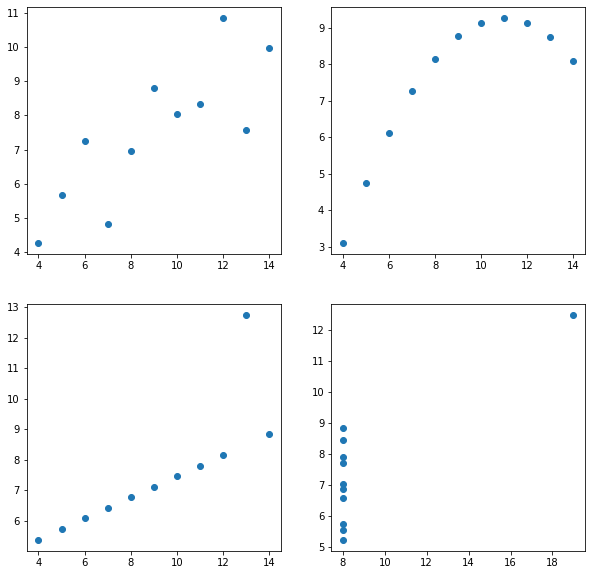

In [68]:
plt.subplots(2, 2, figsize=(10,10))
for index, ds in enumerate(df.dataset.unique(),1): #['I','II','III','IV']
    df_tmp = df.query(f" dataset=='{ds}' ")
    plt.subplot(2, 2, index)
    plt.scatter(df_tmp.x, df_tmp.y)
    print(f"{ds}, mean={df_tmp.y.mean()}, var={df_tmp.y.var()}, corr={pearsonr(df_tmp.x,df_tmp.y)}")

In [69]:
def estimate_coef(x, y):
    xmean, ymean = np.mean(x), np.mean(y) 
    
    a = ((x-xmean)*(y-ymean)).sum() / ((x-xmean)**2).sum()
    b = ymean - a*xmean
    return a,b

In [70]:
def plot_lines(x, y, coef):
    plt.figure(figsize=(7,7))
    plt.scatter(x,y,c="g")
    
    a,b=coef
    y_pred = a*x+b
    plt.plot(x, y_pred, c="r")

In [71]:
np.random.seed(42)
N = 150
X = 6*np.random.randn(N) - 3
y = 2*X + np.random.randn(N)*4

In [72]:
coef = estimate_coef(X, y)
coef

(1.9827761114982505, 0.22473939777177332)

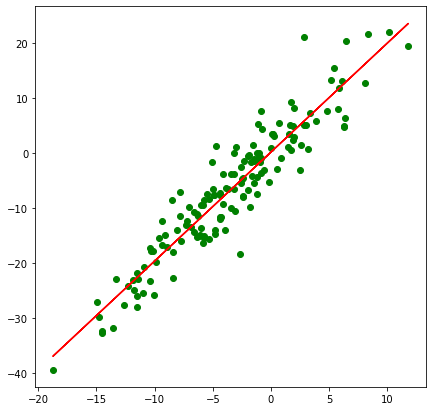

In [73]:
plot_lines(X, y, coef)

In [74]:
pearsonr(X, y)

(0.9395491701574502, 9.044798365691117e-71)

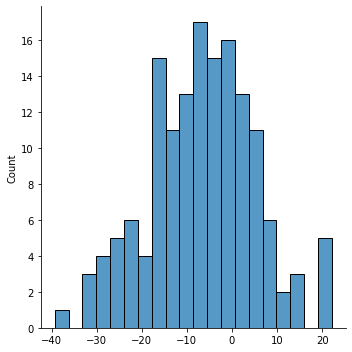

In [75]:
sns.displot(y, bins=20)

### Użycie biblioteki scikit-learn

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
X.shape

(150,)

In [78]:
model = LinearRegression()
model.fit(X.reshape(-1,1), y)

LinearRegression()

In [79]:
model.coef_ , model.intercept_

(array([1.98277611]), 0.22473939777177154)

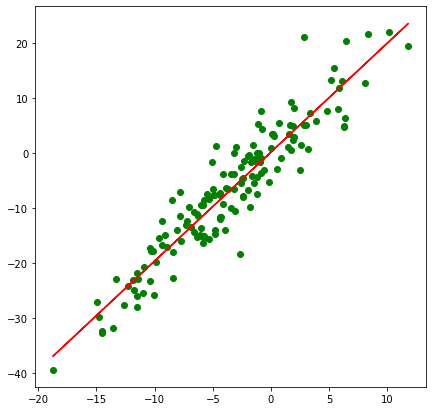

In [80]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [81]:
# importowanie metryk
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [82]:
# obliczenie y_pred
y_pred = model.predict(X.reshape(-1,1))

In [83]:
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), r2_score(y, y_pred)

(3.201533153669174, 16.581591114744775, 0.8827526431435535)

### Efekt lejka

In [84]:
df = pd.read_csv("http://51.91.120.89/extras/advertising.csv", usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [85]:
df.corr()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


In [86]:
X = df.TV.values.reshape(-1,1)
y = df.sales

In [87]:
model = LinearRegression()
model.fit(X, y)
model.coef_, model.intercept_

(array([0.04753664]), 7.0325935491276965)

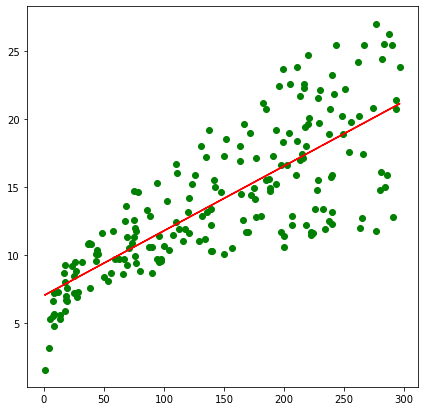

In [88]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [89]:
y_pred = model.predict(X)
r2_score(y, y_pred), mean_squared_error(y, y_pred)

(0.611875050850071, 10.512652915656757)

### Regresja wielomianowa

In [90]:
np.random.seed(0)

X = np.arange(-4, 4.1, 0.2)
y = ((X-2)*(X+4)*(X+1)*(X-1)*(X-3))/14 + np.random.normal(-2.5, 2.5, len(X))

X = X.reshape(-1,1)

In [91]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

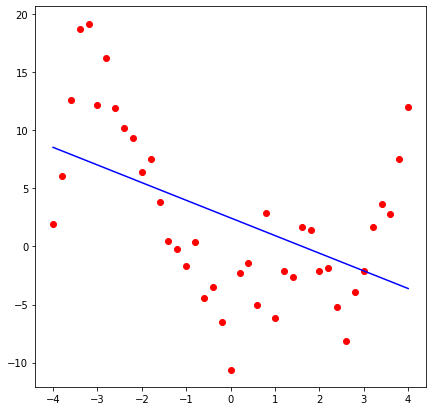

In [92]:
plt.figure(figsize=(7,7))
plt.scatter(X, y, c="r")
plt.plot(X, y_pred, c='b')

In [93]:
r2_score(y, y_pred)

0.2456973012029272

In [94]:
# przygotowanie X na potrzeby regresji wielomianowej
from sklearn.preprocessing import PolynomialFeatures

In [95]:
pf = PolynomialFeatures(degree=4)
X_poly = pf.fit_transform(X)

In [96]:
X[0]

array([-4.])

In [97]:
X_poly[0]

array([  1.,  -4.,  16., -64., 256.])

D=11, R2=0.908154298327959
D=22, R2=0.9494898151271525
D=111, R2=0.2627180435110946


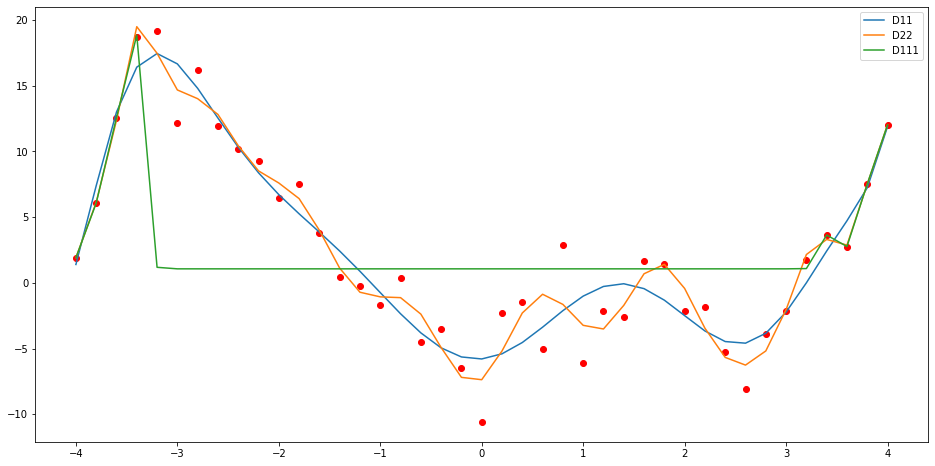

In [98]:
plt.figure(figsize=(16,8))
plt.scatter(X, y, c="r")
for degree in [11,22,111]: #[2,3,11,22,45]: # range(2,9):
    pf = PolynomialFeatures(degree)
    X_poly = pf.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    plt.plot(X, y_pred, label=f"D{degree}")
    print(f"D={degree}, R2={r2_score(y,y_pred)}")

plt.legend()
plt.show()

### Regularyzacja regresji

In [99]:
# klasy do regularyzacji
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [100]:
np.random.seed(0)

X = np.unique( np.random.uniform(-3, 3, 100) )
y = 1/2*(X**2) + X + 2 + np.random.normal(0, 1, len(X))

X = X.reshape(-1,1)

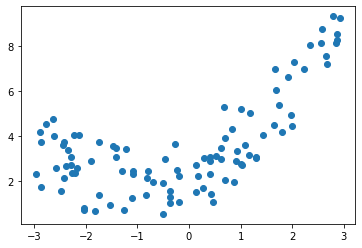

In [101]:
plt.scatter(X, y)

RW: R2=0.8398411453424146
Lasso: R2=0.7560846372182832
Ridge: R2=0.8375368368826693
ElasticNet: R2=0.7609800429915305


C:\Users\kurs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.8020675781386, tolerance: 0.04559490152732705
  model = cd_fast.enet_coordinate_descent(
C:\Users\kurs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.31831426733647, tolerance: 0.04559490152732705
  model = cd_fast.enet_coordinate_descent(


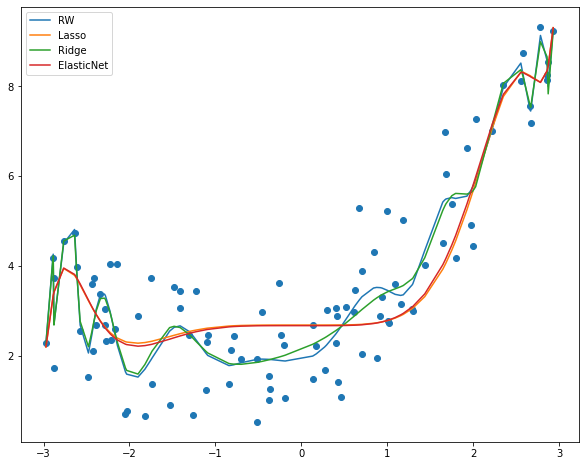

In [107]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)

pf = PolynomialFeatures(31)
X_poly = pf.fit_transform(X)

# RW
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="RW")
print(f"RW: R2={r2_score(y,y_pred)}")

# Lasso
model = Lasso()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="Lasso")
print(f"Lasso: R2={r2_score(y,y_pred)}")

# Ridge
model = Ridge()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="Ridge")
print(f"Ridge: R2={r2_score(y,y_pred)}")

# ElasticNet
model = ElasticNet()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="ElasticNet")
print(f"ElasticNet: R2={r2_score(y,y_pred)}")

plt.legend();

<AxesSubplot:xlabel='y'>

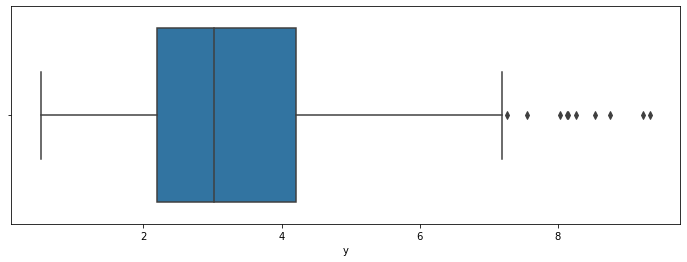

In [118]:
df1 = pd.DataFrame()
df1["X"] = pd.Series(X.flatten())
df1["y"] = y
#df1
plt.figure(figsize=(12,4))
sns.boxplot(data=df1, x="y", whis=1.5)


In [120]:
df_stat =df1.describe()
df_stat

,X,y
count,100.000000,100.000000
mean,-0.163237,3.538541
std,1.738524,2.146053
min,-2.971827,0.518492
25%,-1.765181,2.197844
50%,-0.195114,3.023889
75%,1.106900,4.213514
max,2.930243,9.333268


In [122]:
iqr = df_stat.loc["75%","y"] - df_stat.loc["25%","y"]
iqr

2.015670223718981

In [123]:
max_out = df_stat.loc["75%","y"] + 1.5*iqr
max_out

7.237019379930096

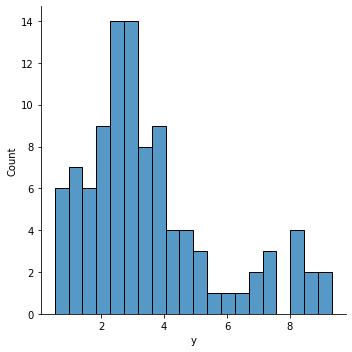

In [125]:
sns.displot(df1.y, bins=20)